# VI-ME-RÉ-BAR sur vos propres données!

**Instructions**:

- Vous effacerez les instructions au fur et à mesure que vous les
  aurez suivies. Commencez par effacer celle-ci!
- Mettez ici une description de votre jeu de données: lequel avez vous
  choisi, quel est le défi? Intuitivement quels critères pourraient
  permettre de distinguer les deux classes d'images?
  

0 et 1

In [1]:
!pip install pillow pandas numpy sklearn matplotlib seaborn

You should consider upgrading via the 'C:\Users\User\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
%load_ext autoreload
%autoreload 2

from utilities import *

In [3]:
# Load general libraries
import os, re
from glob import glob as ls
import numpy as np                    # Matrix algebra library
import pandas as pd                   # Data table (DataFrame) library
import seaborn as sns; sns.set()      # Graphs and visualization library
from PIL import Image                 # Image processing library
import matplotlib.pyplot as plt       # Library to make graphs 
# Command to insert the graphs in line in the notebook:
%matplotlib inline

# Reload code when changes are made
%load_ext autoreload
%autoreload 2

# Import utilities
from utilities import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Étape 1: prétraitement et [VI]sualisation

Le jeu de données consiste en les images suivantes:

**Instruction :** Chargez votre jeu de données comme dans la feuille
`3_jeux_de_donnees.md` de la semaine dernière, en stockant les
images dans la variables `images` et en les affichant.

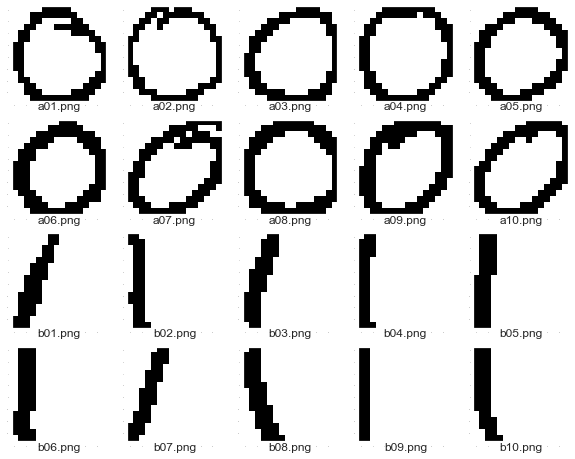

In [4]:
# YOUR CODE HERE
images = load_images("./data/original/", "*.png")
image_grid(images, titles=images.index)

In [5]:
assert isinstance(images, pd.Series)
assert len(images) == 20

### Prétraitement

Les données sont très souvent prétraitées c'est-à-dire **résumées
selon différentes caractéristiques** : chaque élément du jeu de
données est décrit par un ensemble [**d'attributs**](https://en.wikipedia.org/wiki/Feature_(machine_learning))
-- propriétés ou caractéristiques mesurables de cet élément ; pour un
animal, cela peut être sa taille, sa température corporelle, etc.

C'est également le cas dans notre jeu de données : une image est
décrite par le couleur de chacun de ses pixels. Cependant les pixels
sont trop nombreux pour nos besoins. Nous voulons comme la semaine
dernière les remplacer par quelques attributs mesurant quelques
propriétés essentielles de l'image, comme sa couleur ou sa forme
moyenne: ce sont les données prétraitées.

La semaine dernière, les données prétraitées vous ont été fournies
pour les pommes et les bananes.
Cette semaine, grâce aux trois feuilles précédentes, vous avez les
outils et connaissances nécessaires pour effectuer le prétraitement 
directement vous-même:

- la feuille de rappel sur la [gestion de tableaux](1_tableaux.md); 
- la feuille sur le [traitement des images](2_images.md);
- la feuille sur l'[extraction d'attributs](3_extraction_d_attributs.md).

Pour commencer, la table prétraitée contient les attributs `redness`
et `elongation` -- tels que vous les avez défini dans la feuille
[extraction d'attributs](3_extraction_d_attributs.md) -- appliqués à
votre jeu de données":

 utiliser `foreground_filter()` dans le cas ou les images sont bruyantes ou non monochromes

In [6]:
# YOUR CODE HERE
#sample_images = load_images("blablabla", "*.png")
#thresh_images = [foreground_filter(img) for img in images]
#image_grid(thresh_images, titles=images.index)

**Exercice :**
1. Implémentez dans `utilities.py` de nouveaux attributs adaptés à votre jeu de données. Si vous en avez besoin, vous pouvez utiliser les cellules ci-dessous voire en créer de nouvelles; sinon simplement videz les.

  **Indications**: vous pouvez par exemple vous inspirer
  - des attributes existants comme `redness`;
  - des exemples donnés dans le cours: *matched filter*, analyse en composantes principales (PCA).

`elongation()` est deja un premier critere pour separer les 0 et les 1.

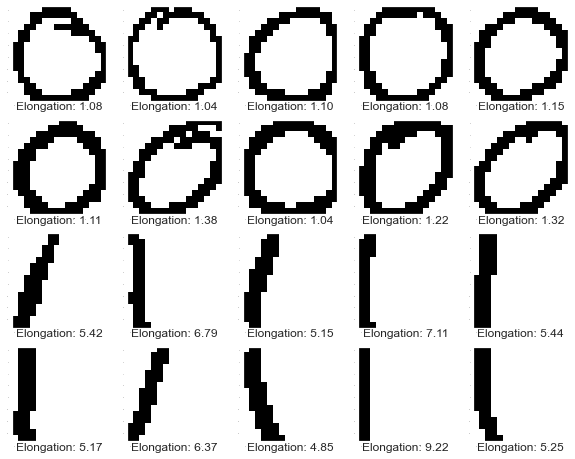

In [7]:
# YOUR CODE HERE
image_grid(images, 
           titles=["Elongation: {0:.2f}".format(elongation(img)) for img in images])

On implemente `boucle()` qui renvoie `True` si l'image en question (supposee noir sur blanc), contient une boucle.
C'est un algorithme recurssif, qui partant d'un pixel blanc, cherche un chemin vers une extremite, le tout en renvoyant des valeurs booleennes.

In [8]:
def entouree(img, coordonnees, done=[]):
        #coordonnees supposees non extremes, non noires
        nimg = np.array(img)
        x = coordonnees[0]
        y = coordonnees[1]
        xs = nimg.shape[0]
        ys = nimg.shape[1]
        if coordonnees in done:
            return True
        if (x==xs-1 or x==0 or y==ys-1 or y==0) and (list(nimg[x][y]) == [255, 255, 255, 255]):
            return False
        if list(nimg[x][y]) != [255, 255, 255, 255]:
            return True
        else:
            done.append(coordonnees)
            c1 = (x, y+1)
            c2 = (x, y-1)
            c3 = (x+1, y)
            c4 = (x-1, y)
            return (True and  entouree(img, c1, done) and entouree(img,c2, done) and entouree(img,c3, done) and entouree(img,c4, done))

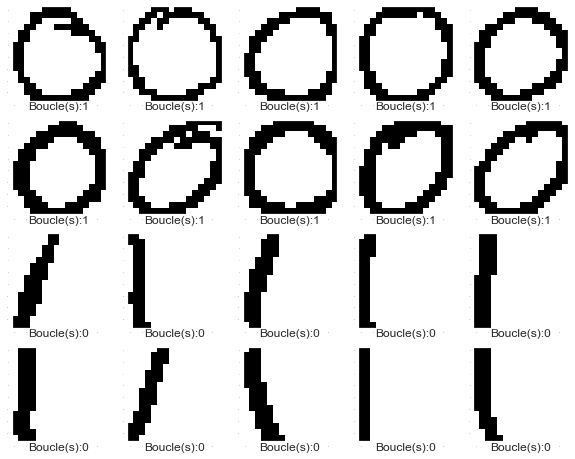

In [9]:
image_grid(images, 
           titles=["Boucle(s):{0:.0f}".format(entouree(images[i], (7,7), [])) for i in range(len(images))])

In [10]:
def boucle(img):
    instances = []
    nimg = np.array(img)
    z = False
    for line in range(len(nimg)):
        for column in range(line):
            if list(nimg[line][column]) == [255,255,255,255]:
                instance_done = []
                zero = entouree(img, (line,column), instance_done)
                if zero:
                    z = True
                    instances+=instance_done
    return (z, instances)

Petite visualisation du traitement effectuee par l'algorithme recurssif

In [11]:
nimages = []
for i in range(len(images)):
    test_img = images[i].copy()
    b, colored = boucle(test_img)
    w, h = test_img.size
    for px in range(w):
        for py in range(h):
            if (px,py) in colored and test_img.getpixel((px,py))==(255,255,255,255):
                test_img.putpixel((px,py), (255,0,0,255))
    nimages.append(test_img)

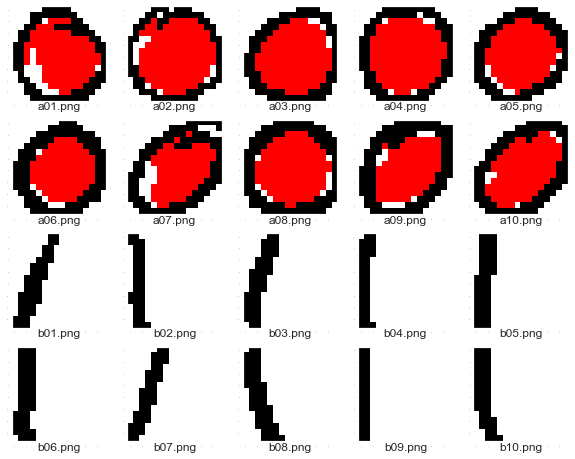

In [12]:
image_grid(nimages, titles=images.index)

On implemente `nb_bandes_zero()` qui renvoie un score proportionel au nombre de lignes contenant deux bandes dans une image. 

In [13]:
def nb_bandes_zero(img):
    nimg = np.array(img)
    xs = nimg.shape[0]
    ys = nimg.shape[1]
    answers=[]
    for i in range(xs):
        lst = nimg[i]
        lst = [0 if list(lst[j])==[255,255,255,255] else 1 for j in range(len(lst))]
        positions = [k for k, v in enumerate(lst) if v==1]
        #print(positions)
        diffpos = [positions[index+1]-v for index, v in enumerate(positions[:-1])]
        #print(diffpos)
        diffpos = [False if v-1>0 else True for v in diffpos]
        #print(diffpos)
        if False in diffpos:
            #
            answers.append(0)
            continue
        else:
            answers.append(1)
            continue
    return answers.count(0)/len(answers)

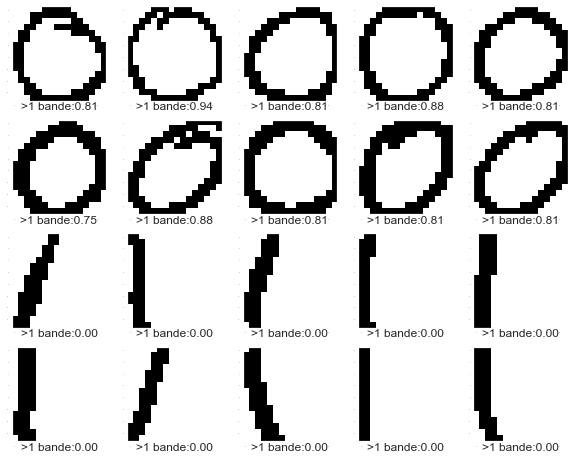

In [14]:
image_grid(images, 
           titles=[">1 bande:{0:.2f}".format(nb_bandes_zero(images[i])) for i in range(len(images))])

In [152]:
from math import sqrt

def linreg(xs,ys):
    moyenne_x = sum(xs)/len(xs)
    moyenne_y = sum(ys)/len(ys)
    a = sum([((x - moyenne_x)*(y - moyenne_y)) for x, y in zip(xs,ys)])/sum([(x-moyenne_x)**2 for x in xs])
    b = moyenne_y - (a * moyenne_x)
    rnum = sum([(x - moyenne_x)*(y - moyenne_y) for x, y in zip(xs,ys)])
    rdenum = sqrt(sum([(x-moyenne_x)**2 for x in xs])*sum([(y-moyenne_y)**2 for y in ys]))
    r = rnum/rdenum
    rss = sum([(y - b+a*x)**2 for x,y in zip(list(np.linspace(xs[0],xs[-1], len(xs))), ys)])
    ess = sum([(y - yp)**2 for yp,y in zip([b+a*x for x in xs], ys)])
    tss = ess+rss
    return (a,b,r,rss,ess,tss)

In [70]:
images_rotations = [img.transpose(Image.ROTATE_90) for img in images]

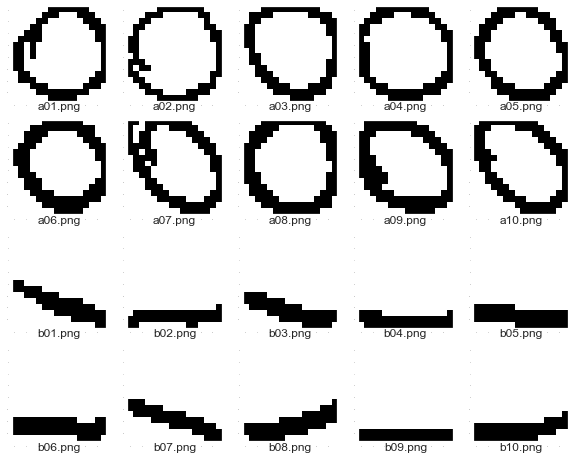

In [71]:
image_grid(images_rotations, 
           titles=images.index)

In [ ]:
[word for sentence in text for word in sentence]
noirs = []
nuages = []

2531.964339201405


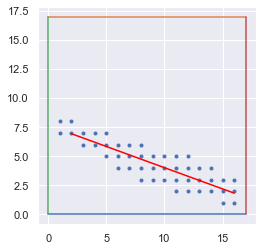

In [155]:
tstimg = np.array(images_rotations[10])
black = [(16-px,py+1) for px in range(len(tstimg)) for py in range(len(tstimg[px])) if list(tstimg[px][py])!=[255,255,255,255]]
xs = [point[1] for point in black]
ys = [point[0] for point in black]
a,b,r,rss,ess,tss = linreg(xs,ys)
abcisse = list(range(2,17))
ordonnee = [a * x + b for x in abcisse]
plt.plot([0,17],[0,0])
plt.plot([0,17],[17,17])
plt.plot([0,0],[0,17])
plt.plot([17,17],[17,0])
plt.axis('square')
plt.plot(abcisse, ordonnee, color="red")
plt.scatter(xs,ys, marker=".")
print(tss)

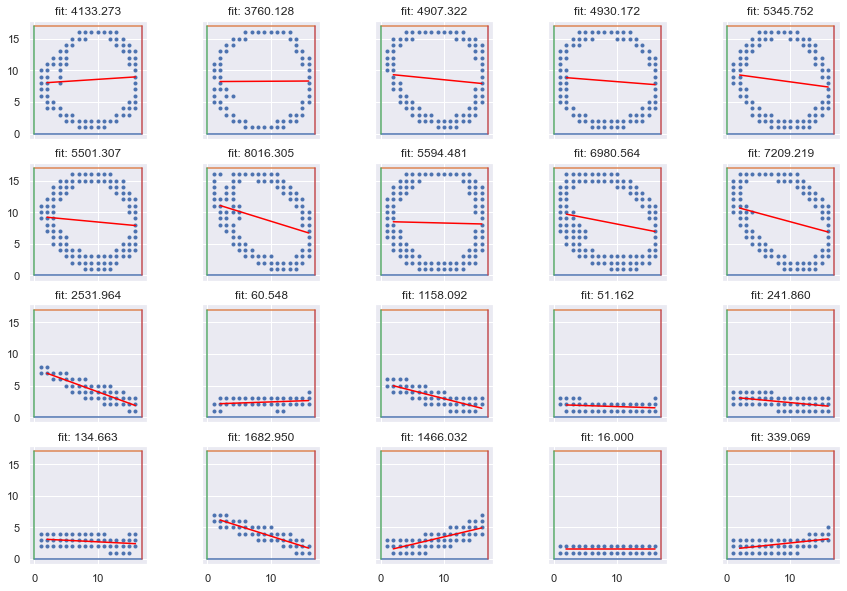

<Figure size 432x288 with 0 Axes>

In [158]:

fig, ax = plt.subplots(4, 5, sharex='col', sharey='row', figsize=(15,10))
fig = plt.figure()
fits = []
for i in range(4):
    for j in range(5):
        tstimg = np.array(images_rotations[i*5+j])
        black = [(16-px,py+1) for px in range(len(tstimg)) for py in range(len(tstimg[px])) if list(tstimg[px][py])!=[255,255,255,255]]
        xs = [point[1] for point in black]
        ys = [point[0] for point in black]
        a,b,r,rss,ess,tss = linreg(xs,ys)
        abcisse = list(range(2,17))
        ordonnee = [a * x + b for x in abcisse]
        ax[i, j].plot([0,17],[0,0])
        ax[i, j].plot([0,17],[17,17])
        ax[i, j].plot([0,0],[0,17])
        ax[i, j].plot([17,17],[17,0])
        ax[i, j].axis('square')
        ax[i, j].plot(abcisse, ordonnee, color="red")
        ax[i, j].scatter(xs,ys, marker=".")
        ax[i, j].title.set_text("fit: {0:.3f}".format(tss))
        fits.append(tss)
        #ax[i, j].plot(xs,ys)

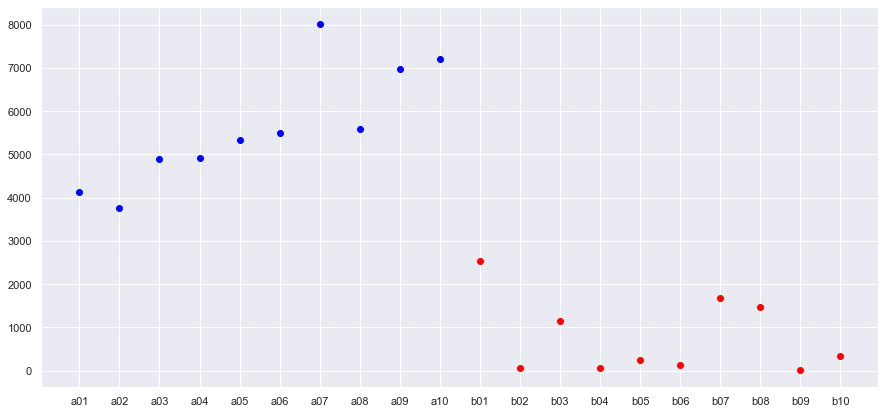

In [159]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(7)
plt.scatter([images.index[i][:-4] for i in range(10)],fits[:10], color='blue')
plt.scatter([images.index[i][:-4] for i in range(10,20)],fits[10:], color='red')


2. Comment les avez-vous choisis?

    Les zeros et les 1 ont pour difference principale la presence ou pas de boucle.
    
    Le nombre de bandes verticales est aussi un facteur indicateur de 1 ou de zero
    

3. Ajoutez une colonne par attribut dans la table `df`, en conservant les précédents

In [17]:
# YOUR CODE HERE
df = pd.DataFrame()
#df["images"] = [images.index[i] for i in range(len(images))]
#df["class"] = df["images"].map(lambda name: 1 if name.startswith('a') else -1)
df["class"] = [1 if name.startswith('a') else -1 for name in images.index]
df["redness"] = [redness(images[i]) for i in range(len(images))]
df["elongation"] = [elongation(images[i]) for i in range(len(images))]
df["Boucle"] = [float(boucle(images[i])[0]) for i in range(len(images))]
df["Bandes verticales"] = [nb_bandes(images[i]) for i in range(len(images))]
df

NameError: name 'nb_bandes' is not defined

Vérifications:
- la table d'origine est préservée:

In [ ]:
assert len(df[df['class'] ==  1]) == 10
assert len(df[df['class'] == -1]) == 10
assert 'redness' in df.columns
assert 'elongation' in df.columns

- Nouveaux attributs:

In [ ]:
assert len(df.columns) > 3, "Ajoutez au moins un attribut!"
assert df.notna().all(axis=None), "Valeurs manquantes!"
for attribute in df.columns[3:]:
    assert pd.api.types.is_numeric_dtype(df[attribute]), \
        f"L'attribut {attribute} n'est pas numérique"

In [ ]:
assert len(df.columns) > 4, "Gagnez un point en ajoutant un autre attribut"

**Exercice :** Standardisez les colonnes à l'exception de la colonne
`class`, afin de calculer les corrélations entre colonnes

In [ ]:
# YOUR CODE HERE
df_classless = df.copy()
dfstd  = (df_classless - df_classless.mean())/df_classless.std()
dfstd["redness"] = df["redness"]
dfstd["class"] = df["class"]
dfstd

Vérifions :

In [ ]:
dfstd.mean()
dfstd.std()-1

In [ ]:
assert dfstd.shape == df.shape
assert dfstd.index.equals(df.index)
assert dfstd.columns.equals(df.columns)
assert (abs(dfstd.mean()) < 0.01).all()
assert (abs(dfstd.std() - 1) < 0.1).all()

Le prétraitement est terminé!

### Visualisation

**Exercice :** Extrayons quelques statistiques de base:

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**Exercice :**
- Visualisez le tableau de données sous forme de carte de chaleur (*heat map*):

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

- sa matrice de corrélation:

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

- ainsi que le nuage de points (*scatter plot*):

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Observations

**Exercice :** Décrivez ici vos observations: corrélations apparentes
ou pas, interprétation de ces corrélations à partir du nuage de
points, etc. Est-ce que les attributs choisis semblent suffisants?
Quel attribut semble le plus discriminant? Est-ce qu'un seul d'entre
eux suffirait?

VOTRE RÉPONSE ICI

## Étape 2: [ME]sure de performance (*[ME]tric*)

Pour mesurer les performances de ce problème de classification, nous
utiliserons la même métrique par taux d'erreur que dans le TP3:

In [ ]:
show_source(error_rate)

### Partition (*split*) du jeu de données en ensemble d'entraînement et ensemble de test

Extraire, depuis `dfstd`, les deux attributs choisis dans `X` et la vérité terrain dans
`Y`:

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Ajouter un autotest que les attributs ne sont pas redness/elongation : un nouvel attribut ; deux nouveaux attributs

In [ ]:
assert isinstance(X, pd.DataFrame), "X n'est pas une table Pandas"
assert X.shape == (20,2), "X n'est pas de la bonne taille"
assert set(X.columns) != {'redness', 'elongation'}

In [ ]:
assert 'redness' not in X.columns and 'elongation' not in X.columns, \
   "Pour un point de plus: ne réutiliser ni la rougeur, ni l'élongation"

**Exercice :** Maintenant partitionnez l'index des images en ensemble
d'entraînement (`train_index`) et ensemble de test
(`test_index`). Récupérez les attributs et classes de vos images selon
l'ensemble d'entraînement `(Xtrain, Ytrain)` et celui de test `(Xtest,
Ytest)`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert train_index.shape == test_index.shape
assert list(sorted(np.concatenate([train_index, test_index]))) == list(range(20))

assert Xtest.shape == Xtrain.shape
assert pd.concat([Xtest, Xtrain]).sort_index().equals(X.sort_index())

assert Ytest.shape == Ytrain.shape
assert pd.concat([Ytest, Ytrain]).sort_index().equals(Y.sort_index())
assert Ytest.value_counts().sort_index().equals(Ytrain.value_counts().sort_index())

**Exercice :** Affichez les images qui serviront à entraîner notre
modèle de prédiction (*predictive model*):

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**Exercice :** Affichez celles qui permettent de le tester et
d'évaluer sa performance:

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**Exercice :** Représentez les images sous forme de nuage de points en
fonction de leurs attributs:

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Taux d'erreur

Comme la semaine dernière, nous utiliserons le taux d'erreur comme
métrique, d'une part sur l'ensemble d'entraînement, d'autre part sur
l'ensemble de test. Implémentez la fonction `error_rate` dans votre
utilities.py. Pour vérifier que c'est correctement fait, nous
affichons son code ci-dessous:

In [ ]:
show_source(error_rate)

## Étape 3: [RE]férence (*base line*)

### Classificateur

- En Semaine 4: faites la suite de cette feuille avec l'algorithme du
  plus proche voisin, comme en Semaine 3.

- En Semaine 5: faites la feuille sur les [classificateurs](../Semaine5/1_classificateurs.md)
  puis faites la suite de cette feuille avec votre propre classificateur,
  en notant au préalable votre choix de classificateur ici:

  VOTRE RÉPONSE ICI

**Exercice :** 
Ci-dessous, définissez puis entraînez votre classificateur sur l'ensemble d'entraînement.

**Indication :** Si vous avez besoin de code supplémentaire pour cela, mettez-le dans `utilities.py`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**Exercice :** Calculez les prédictions sur l'ensemble d'entraînement
et l'ensemble de test, ainsi que les taux d'erreur dans les deux cas:

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
print("Training error:", e_tr)
print("Test error:", e_te)

In [ ]:
assert Ytrain_predicted.shape == Ytrain.shape
assert Ytest_predicted.shape == Ytest.shape
assert 0 <= e_tr and e_tr <= 1
assert 0 <= e_te and e_te <= 1

Visualisons les prédictions obtenues:

In [ ]:
# The training examples are shown as white circles and the test examples are black squares.
# The predictions made are shown as letters in the black squares.
make_scatter_plot(X, images.apply(transparent_background_filter),
                  train_index, test_index, 
                  predicted_labels=Ytest_predicted, axis='square')

### Interprétation

**Exercice :** Donnez ici votre interprétation des résultats. La
performance des prédictions paraît elle satisfaisante? Avez vous une
première intuition de comment l'améliorer?

VOTRE RÉPONSE ICI

## Étape 4: [BAR]res d'erreur (*error bar*)

### Barre d'erreur 1-sigma

**Exercice :** Comme première estimation de la barre d'erreur,
calculez la barre d'erreur 1-sigma pour le taux d'erreur `e_te`:

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
print("TEST SET ERROR RATE: {0:.2f}".format(e_te))
print("TEST SET STANDARD ERROR: {0:.2f}".format(sigma))

### Barre d'erreur par validation croisée (Cross-Validation)

Nous calculons maintenant une autre estimation de la barre d'erreur en
répétant l'évaluation de performance pour de multiples partitions
entre ensemble d'entraînement et ensemble de test :

In [ ]:
n_te = 10
SSS = StratifiedShuffleSplit(n_splits=n_te, test_size=0.5, random_state=5)
E = np.zeros([n_te, 1])
k = 0
for train_index, test_index in SSS.split(X, Y):
    print("TRAIN:", train_index, "TEST:", test_index)
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    Ytrain, Ytest = Y.iloc[train_index], Y.iloc[test_index]
    neigh.fit(Xtrain, Ytrain.ravel()) 
    Ytrain_predicted = neigh.predict(Xtrain)
    Ytest_predicted = neigh.predict(Xtest)
    e_tr = error_rate(Ytrain, Ytrain_predicted)
    e_te = error_rate(Ytest, Ytest_predicted)
    print("TRAIN ERROR RATE:", e_tr)
    print("TEST ERROR RATE:", e_te)
    E[k] = e_te
    k = k+1
    
e_te_ave = np.mean(E)
# It is bad practice to show too many decimal digits:
print("\n\nCV ERROR RATE: {0:.2f}".format(e_te_ave))
print("CV STANDARD DEVIATION: {0:.2f}".format(np.std(E)))

sigma = np.sqrt(e_te_ave * (1-e_te_ave) / n_te)
print("TEST SET STANDARD ERROR (for comparison): {0:.2f}".format(sigma))

## Conclusion

**Exercice :** Résumez ici les performances obtenues, tout d'abord
avec votre référence, puis avec les variantes que vous aurez explorées
en changeant d'attributs et de classificateur. Puis vous commenterez sur
la difficulté du problème ainsi que les pistes possibles pour obtenir
de meilleures performances, ou pour généraliser le problème.

VOTRE RÉPONSE ICI

**Exercice :** Complétez votre rapport (Semaine 4/Semaine5)